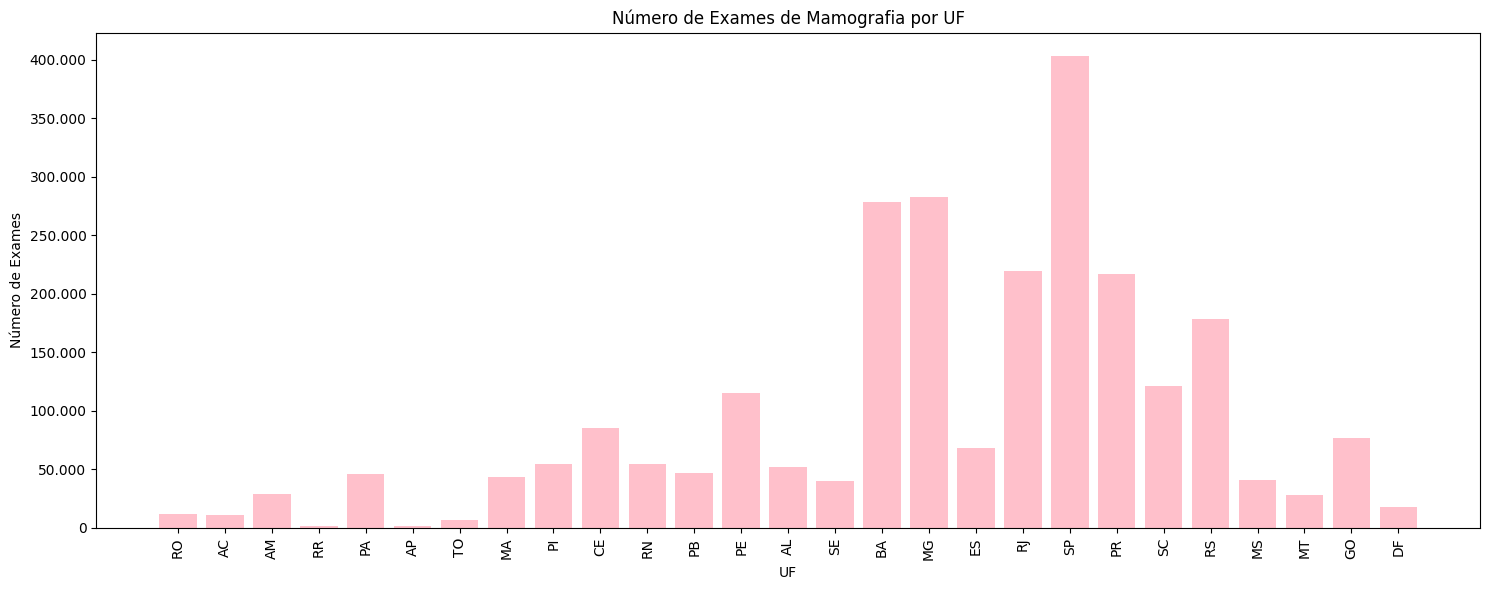

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import unicodedata
from matplotlib.ticker import FuncFormatter

df = pd.read_csv(r"C:\Users\luane\Downloads\mamografia.py", encoding='utf-8', sep=';')

# configurar textos
def clean_text(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    return text

df['UF de residencia'] = df['UF de residencia'].apply(clean_text)

df.columns = df.columns.str.replace('�', 'e')
df = df[df['UF de residencia'] != 'Total']
df['UF de residencia'] = df['UF de residencia'].apply(lambda x: x.split(' ')[1] if len(x.split(' ')) > 1 else x)

# gerar gráfico
plt.figure(figsize=(15, 6))
plt.bar(df['UF de residencia'], df['Exames'], color='pink')
plt.title('Número de Exames de Mamografia por UF')
plt.xlabel('UF')
plt.ylabel('Número de Exames')
plt.xticks(rotation=90)

#formatar números eixo y
def formatar_milhar(x, pos):
    return f'{int(x):,}'.replace(',', '.')
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_milhar))

plt.tight_layout()
plt.show()